In [2]:
#importing packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\salma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\salma\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\salma\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\salma\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [3]:
data = pd.read_excel("Product1.xlsx", sheet_name='Sheet1')

In [4]:
data

,Id,title,rating,body
0,1,A T-Shirt,"""5.0 out of 5 stars""","""Tight a lying shirt slimfit shirts."""
1,2,Fits like a glove,"""5.0 out of 5 stars""","""The three Romberg undershirts fit like a glo..."
2,3,Fits great,"""5.0 out of 5 stars""","""Very good quality and comfortable to wear."""
3,4,sturdier / firmer quality,"""4.0 out of 5 stars""","""I expected something more robust / solid qua..."
4,5,Ideal fit!,"""5.0 out of 5 stars""","""Bodysuits fit and hug the body ideally. Best..."
5,6,Super Quality,"""5.0 out of 5 stars""","""Super"""
6,7,Wrong colour,"""5.0 out of 5 stars""","""Unfortunately the shirts were not delivered ..."
7,8,Scratchy and no slim fit,"""5.0 out of 5 stars""","""Unfortunately, the sticker at the neck are v..."
8,9,Bad Price-Performance Ratio,"""1.0 out of 5 stars""","""Very uncomfortable to wear, bad quality"""
9,10,Everything Great,"""5.0 out of 5 stars""","""Everything Great"""


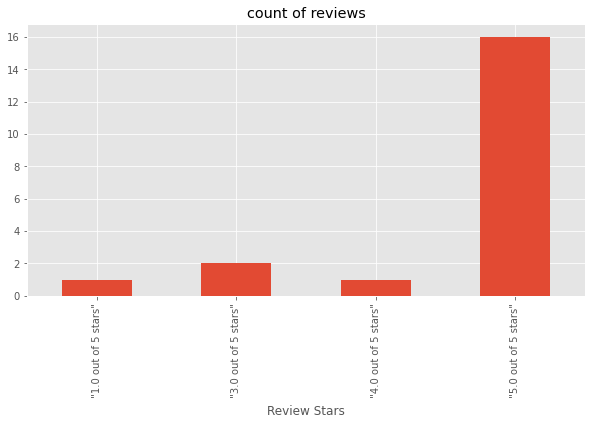

In [6]:
# Create a bar chart of the count of reviews for different star ratings 
ax = data['rating'].value_counts(0).sort_index()\
     .plot(kind='bar', title='count of reviews', figsize=(10,5))

ax.set_xlabel('Review Stars')
plt.show()

In [11]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [12]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.549, 'pos': 0.451, 'compound': 0.6249}

In [13]:
#running the polarity score on the entire dataset
res = {}
for i, row in tqdm(data.iterrows(), total=len(data)):
    myid = row['Id']
    title = row['title']
    rating = row['rating']
    body = row['body']
    res[myid] = sia.polarity_scores(body)
    

  0%|          | 0/20 [00:00<?, ?it/s]

In [14]:
res

{1: {'neg': 0.459, 'neu': 0.541, 'pos': 0.0, 'compound': -0.5267},
 2: {'neg': 0.0, 'neu': 0.578, 'pos': 0.422, 'compound': 0.743},
 3: {'neg': 0.0, 'neu': 0.435, 'pos': 0.565, 'compound': 0.7574},
 4: {'neg': 0.105, 'neu': 0.399, 'pos': 0.497, 'compound': 0.7828},
 5: {'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.9168},
 6: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 7: {'neg': 0.056, 'neu': 0.664, 'pos': 0.279, 'compound': 0.7717},
 8: {'neg': 0.194, 'neu': 0.806, 'pos': 0.0, 'compound': -0.4391},
 9: {'neg': 0.615, 'neu': 0.385, 'pos': 0.0, 'compound': -0.7501},
 10: {'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'compound': 0.6249},
 11: {'neg': 0.0, 'neu': 0.549, 'pos': 0.451, 'compound': 0.6249},
 12: {'neg': 0.109, 'neu': 0.891, 'pos': 0.0, 'compound': -0.2111},
 13: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 14: {'neg': 0.0, 'neu': 0.71, 'pos': 0.29, 'compound': 0.5423},
 15: {'neg': 0.0, 'neu': 0.715, 'pos': 0.285, 'compound': 0.5563},
 16: {'neg': 

In [15]:
# Convert the results of the VADER sentiment analysis to a pandas DataFrame and transpose it
# Merge the VADER results DataFrame with the original 'data' DataFrame using the 'Id' column as the key
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index':'Id'})
vaders = vaders.merge(data, how='left')

In [16]:
#sentiment score and metadata
vaders

,Id,neg,neu,pos,compound,title,rating,body
0,1,0.459,0.541,0.000,-0.5267,A T-Shirt,"""5.0 out of 5 stars""","""Tight a lying shirt slimfit shirts."""
1,2,0.000,0.578,0.422,0.7430,Fits like a glove,"""5.0 out of 5 stars""","""The three Romberg undershirts fit like a glo..."
2,3,0.000,0.435,0.565,0.7574,Fits great,"""5.0 out of 5 stars""","""Very good quality and comfortable to wear."""
3,4,0.105,0.399,0.497,0.7828,sturdier / firmer quality,"""4.0 out of 5 stars""","""I expected something more robust / solid qua..."
4,5,0.000,0.318,0.682,0.9168,Ideal fit!,"""5.0 out of 5 stars""","""Bodysuits fit and hug the body ideally. Best..."
5,6,0.000,1.000,0.000,0.0000,Super Quality,"""5.0 out of 5 stars""","""Super"""
6,7,0.056,0.664,0.279,0.7717,Wrong colour,"""5.0 out of 5 stars""","""Unfortunately the shirts were not delivered ..."
7,8,0.194,0.806,0.000,-0.4391,Scratchy and no slim fit,"""5.0 out of 5 stars""","""Unfortunately, the sticker at the neck are v..."
8,9,0.615,0.385,0.000,-0.7501,Bad Price-Performance Ratio,"""1.0 out of 5 stars""","""Very uncomfortable to wear, bad quality"""
9,10,0.000,0.196,0.804,0.6249,Everything Great,"""5.0 out of 5 stars""","""Everything Great"""


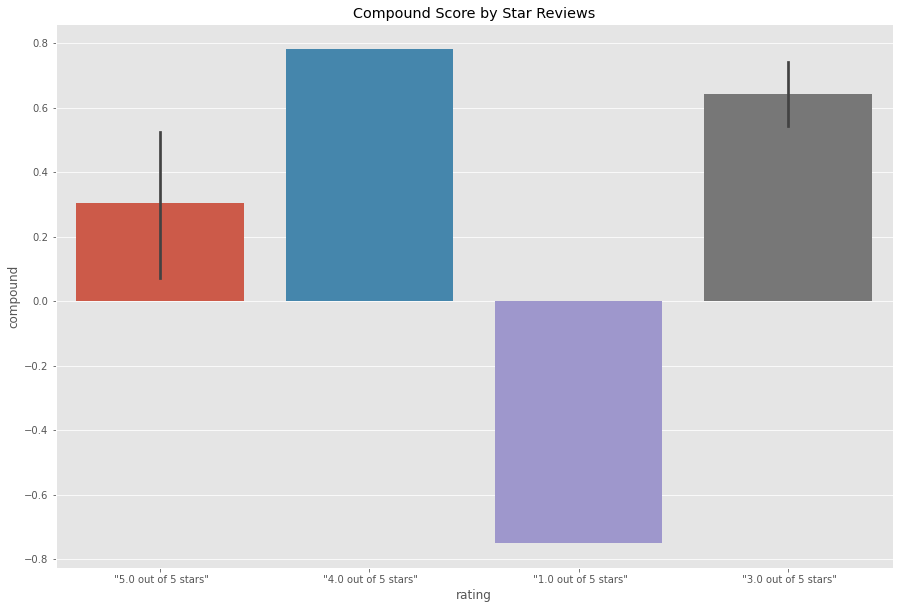

In [17]:
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.barplot(data=vaders, x='rating', y='compound')
ax.set_title('Compound Score by Star Reviews')
plt.show()

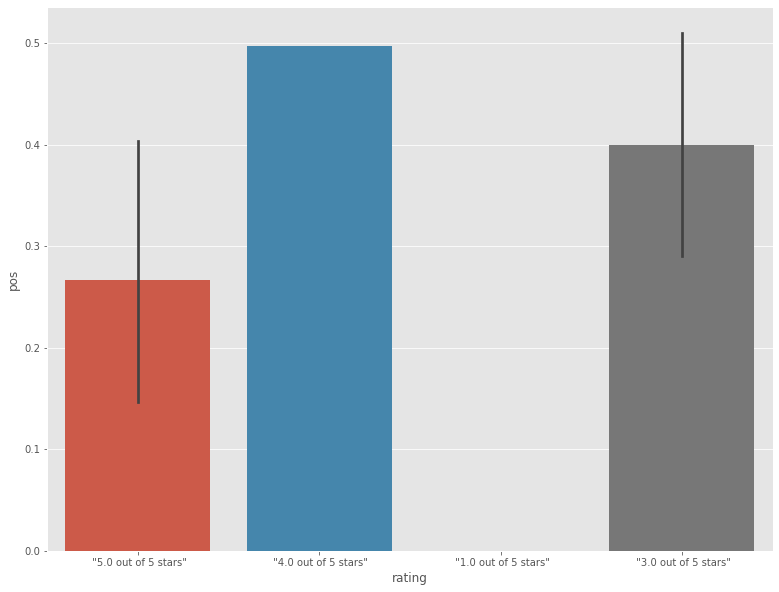

In [23]:
#Positive
fig, axs = plt.subplots(figsize=(13, 10))
sns.barplot(data=vaders, x='rating', y='pos')
ax.set_title('Positive')

plt.show()


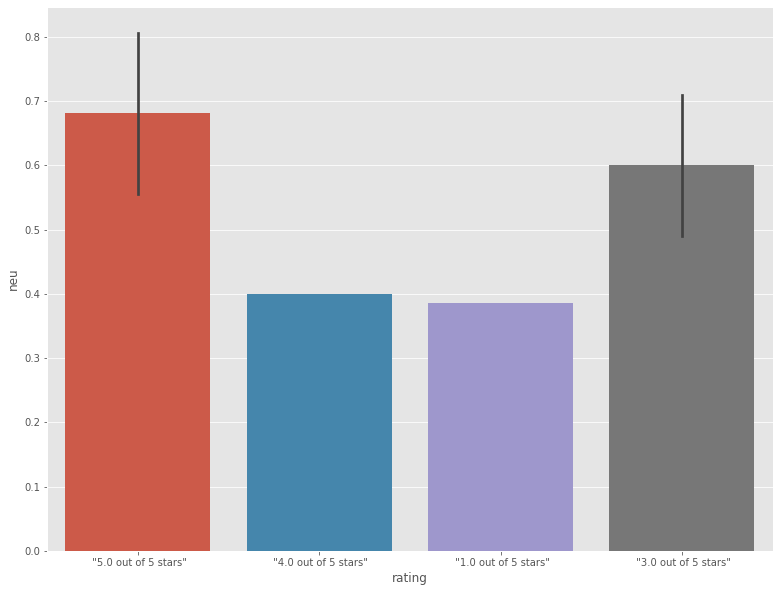

In [22]:
#Neutral
fig, axs = plt.subplots(figsize=(13, 10))
sns.barplot(data=vaders, x='rating', y='neu')
ax.set_title('Neutral')

plt.show()


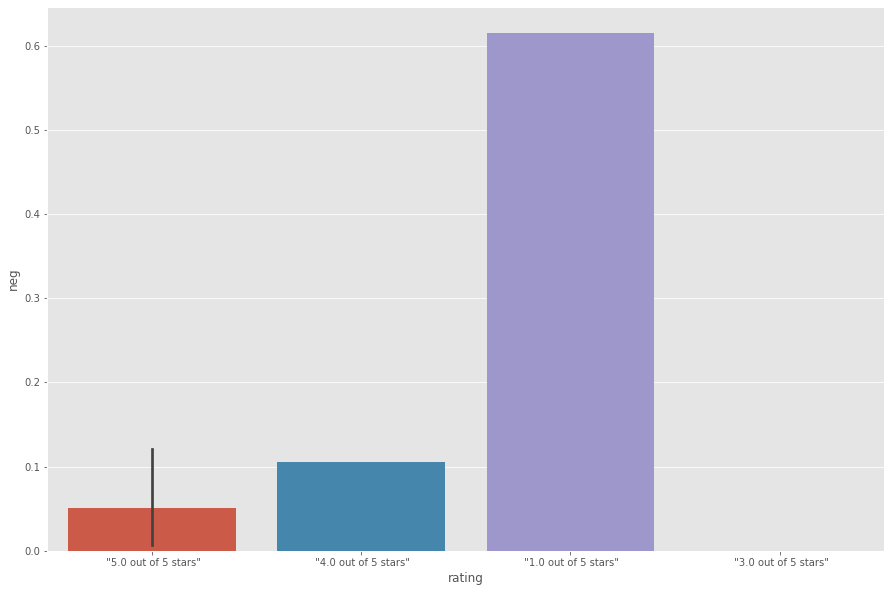

In [20]:
#Negative
fig, axs = plt.subplots(figsize=(15, 10))
sns.barplot(data=vaders, x='rating', y='neg')
ax.set_title('Negative')

plt.show()


In [20]:
from transformers import pipeline

In [21]:
# Load the EmoRoBERTa model for sentiment analysis using the Hugging Face Transformers library
emotion = pipeline('sentiment-analysis', model='arpanghoshal/EmoRoBERTa')

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at arpanghoshal/EmoRoBERTa.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


In [23]:
data['body'].apply(emotion)

0     [{'label': 'neutral', 'score': 0.9893103837966...
1     [{'label': 'approval', 'score': 0.981884241104...
2     [{'label': 'admiration', 'score': 0.9739356637...
3     [{'label': 'admiration', 'score': 0.8822244405...
4     [{'label': 'approval', 'score': 0.831463575363...
5     [{'label': 'admiration', 'score': 0.7439153790...
6     [{'label': 'neutral', 'score': 0.8663533926010...
7     [{'label': 'annoyance', 'score': 0.90024197101...
8     [{'label': 'disgust', 'score': 0.9591835737228...
9     [{'label': 'admiration', 'score': 0.9838485717...
10    [{'label': 'admiration', 'score': 0.9897816181...
11    [{'label': 'neutral', 'score': 0.9508330821990...
12    [{'label': 'desire', 'score': 0.64997339248657...
13    [{'label': 'approval', 'score': 0.977361619472...
14    [{'label': 'approval', 'score': 0.940383672714...
15    [{'label': 'admiration', 'score': 0.8720844984...
16    [{'label': 'approval', 'score': 0.940631568431...
17    [{'label': 'admiration', 'score': 0.947023

In [24]:
def get_emotion_label(text):
    return(emotion(text)[0]['label'])

In [25]:
def get_emotion_label2(text):
    return(emotion(text)[0]['score'])

In [26]:
data['body'].apply(get_emotion_label)

0        neutral
1       approval
2     admiration
3     admiration
4       approval
5     admiration
6        neutral
7      annoyance
8        disgust
9     admiration
10    admiration
11       neutral
12        desire
13      approval
14      approval
15    admiration
16      approval
17    admiration
18      approval
19    admiration
Name: body, dtype: object

In [27]:
data['body'].apply(get_emotion_label2)

0     0.989310
1     0.981884
2     0.973936
3     0.882224
4     0.831464
5     0.743915
6     0.866353
7     0.900242
8     0.959184
9     0.983849
10    0.989782
11    0.950833
12    0.649973
13    0.977362
14    0.940384
15    0.872084
16    0.940632
17    0.947023
18    0.505805
19    0.860247
Name: body, dtype: float64

In [28]:
data['emotion'] = data['body'].apply(get_emotion_label)
data

,Id,title,rating,body,emotion
0,1,A T-Shirt,"""5.0 out of 5 stars""","""Tight a lying shirt slimfit shirts.""",neutral
1,2,Fits like a glove,"""5.0 out of 5 stars""","""The three Romberg undershirts fit like a glo...",approval
2,3,Fits great,"""5.0 out of 5 stars""","""Very good quality and comfortable to wear.""",admiration
3,4,sturdier / firmer quality,"""4.0 out of 5 stars""","""I expected something more robust / solid qua...",admiration
4,5,Ideal fit!,"""5.0 out of 5 stars""","""Bodysuits fit and hug the body ideally. Best...",approval
5,6,Super Quality,"""5.0 out of 5 stars""","""Super""",admiration
6,7,Wrong colour,"""5.0 out of 5 stars""","""Unfortunately the shirts were not delivered ...",neutral
7,8,Scratchy and no slim fit,"""5.0 out of 5 stars""","""Unfortunately, the sticker at the neck are v...",annoyance
8,9,Bad Price-Performance Ratio,"""1.0 out of 5 stars""","""Very uncomfortable to wear, bad quality""",disgust
9,10,Everything Great,"""5.0 out of 5 stars""","""Everything Great""",admiration


In [29]:
data['score'] = data['body'].apply(get_emotion_label2)
data

,Id,title,rating,body,emotion,score
0,1,A T-Shirt,"""5.0 out of 5 stars""","""Tight a lying shirt slimfit shirts.""",neutral,0.989310
1,2,Fits like a glove,"""5.0 out of 5 stars""","""The three Romberg undershirts fit like a glo...",approval,0.981884
2,3,Fits great,"""5.0 out of 5 stars""","""Very good quality and comfortable to wear.""",admiration,0.973936
3,4,sturdier / firmer quality,"""4.0 out of 5 stars""","""I expected something more robust / solid qua...",admiration,0.882224
4,5,Ideal fit!,"""5.0 out of 5 stars""","""Bodysuits fit and hug the body ideally. Best...",approval,0.831464
5,6,Super Quality,"""5.0 out of 5 stars""","""Super""",admiration,0.743915
6,7,Wrong colour,"""5.0 out of 5 stars""","""Unfortunately the shirts were not delivered ...",neutral,0.866353
7,8,Scratchy and no slim fit,"""5.0 out of 5 stars""","""Unfortunately, the sticker at the neck are v...",annoyance,0.900242
8,9,Bad Price-Performance Ratio,"""1.0 out of 5 stars""","""Very uncomfortable to wear, bad quality""",disgust,0.959184
9,10,Everything Great,"""5.0 out of 5 stars""","""Everything Great""",admiration,0.983849


Text(0.5, 1.0, 'Emotion Distribution')

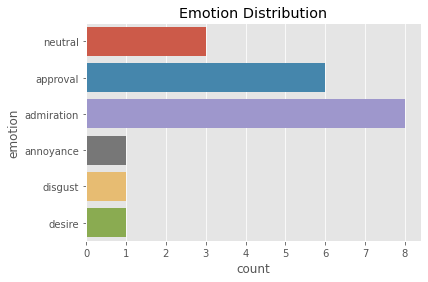

In [30]:
sns.countplot(data=data, y='emotion').set_title('Emotion Distribution')